Accuracy: 0.9838565022421525


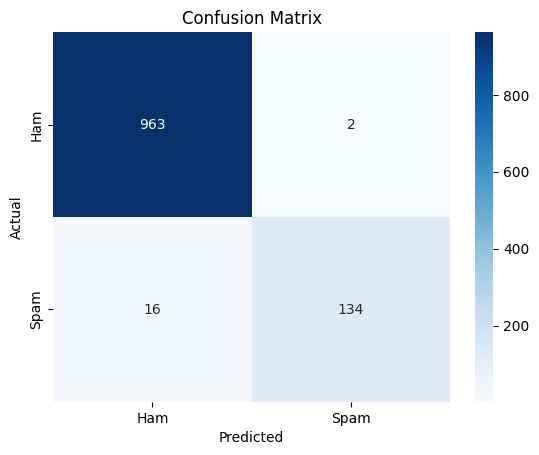


Classification Report:

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.99      0.89      0.94       150

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [11]:
# 📧 Spam Email Detection using Scikit-learn

#This notebook demonstrates how to build a predictive model using Scikit-learn to classify emails as spam or not spam (ham). We'll use the classic **SMS Spam Collection Dataset** and build a classification model using **Naive Bayes**.

#---

## 📦 Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
#---

## 📥 Step 2: Load Dataset

#We'll use the [SMS Spam Collection dataset](https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset) (a public dataset).
# Load dataset (downloaded or mounted)
df = pd.read_csv("spam.csv", encoding='latin-1')[['v1', 'v2']]
df.columns = ['label', 'message']

df.head()
#---

## 📊 Step 3: Data Preprocessing

#- Convert labels to binary (spam = 1, ham = 0)
#- Split data into train/test
#- Vectorize text using `CountVectorizer`
# Convert labels to binary
df['label_num'] = df.label.map({'ham': 0, 'spam': 1})

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label_num'], test_size=0.2, random_state=42)

# Convert text to feature vectors
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
#---

## 🤖 Step 4: Train the Model

#We'll use **Multinomial Naive Bayes**, a common algorithm for text classification.
model = MultinomialNB()
model.fit(X_train_vec, y_train)
#---

## ✅ Step 5: Evaluate the Model
y_pred = model.predict(X_test_vec)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Ham", "Spam"], yticklabels=["Ham", "Spam"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))
